In [1]:
from google.colab import drive


drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from math import nan, isnan
from mlxtend.frequent_patterns import apriori


In [13]:
df_book_ratings = pd.read_csv('/content/gdrive/MyDrive/Ratings.csv',encoding='unicode_escape')
df_books = pd.read_csv('/content/gdrive/MyDrive/Books.csv')
df_users = pd.read_csv('/content/gdrive/MyDrive/Users.csv',encoding='unicode_escape')



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
df_book_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [15]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [16]:
df_final = pd.merge(df_book_ratings,df_books,on = ['ISBN'],how='left')

In [17]:
df_final = pd.merge(df_final,df_users, on= ['User-ID'], how='left')

In [18]:
df_null  = df_final[df_final['Book-Title'].isnull()]

In [19]:
df_null

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
6,276736,3257224281,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"salzburg, salzburg, austria",NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"sydney, new south wales, australia",14.0
9,276745,342310538,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"berlin, berlin, germany",27.0
25,276748,3442437407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jubail ind.-city, eastern province, saudi arabia",39.0
26,276751,033390804X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"zuerich, zh, switzerland",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1149444,276675,0747252327,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"mooroolbark, victoria, australia",57.0
1149446,276679,8804413530,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"beverly hills, yukon territory, vietnam",NaN
1149581,276680,0679781587,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hopewell junction, new york, usa",55.0
1149758,276697,8445072897,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"oviedo, asturias, spain",29.0


In [20]:
df_drop_null = df_final.dropna()

In [21]:
df_drop_null = df_drop_null.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)

In [22]:
df_drop_null

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.0
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,"paris, n/a, france",37.0
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,"iowa city, iowa, usa",25.0
...,...,...,...,...,...,...,...,...,...
1149756,276690,0590581066,0,Triplet Trouble and the Red Heart Race (Triple...,Debbie Dadey,1996,Scholastic Paperbacks,"wakeman, ohio, usa",43.0
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,"wakeman, ohio, usa",43.0
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,"quebec, quebec, canada",18.0
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,"mannington, west virginia, usa",38.0


In [23]:
most_read = df_drop_null['Book-Title'].value_counts().reset_index()
most_read.columns = ['Book-Title', 'COUNT']

In [24]:
most_read.shape

(205170, 2)

In [25]:
atleast_50_books = most_read[most_read['COUNT'] >= 50]

In [26]:
df_final = pd.merge(atleast_50_books,df_drop_null, on= ['Book-Title'], how='left')

In [27]:
df_final = df_final.dropna()

In [28]:
df_final

,Book-Title,COUNT,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,Wild Animus,2141,276925,0971880107,0,Rich Shapero,2004,Too Far,"barcelona, barcelona, spain",22.0
1,Wild Animus,2141,276939,0971880107,0,Rich Shapero,2004,Too Far,"poissy, yvelines, france",23.0
2,Wild Animus,2141,276954,0971880107,0,Rich Shapero,2004,Too Far,"freiburg, baden-wuerttemberg, germany",43.0
3,Wild Animus,2141,277157,0971880107,0,Rich Shapero,2004,Too Far,"garden grove, california, usa",70.0
4,Wild Animus,2141,277378,0971880107,0,Rich Shapero,2004,Too Far,"vancouver, british columbia, canada",33.0
...,...,...,...,...,...,...,...,...,...,...
169254,Sister of My Heart,50,270713,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,"toronto, ontario, canada",27.0
169255,Sister of My Heart,50,273086,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,"chicago, illinois, usa",33.0
169256,Sister of My Heart,50,273587,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,"den haag, zuid-holland, netherlands",60.0
169257,Sister of My Heart,50,274004,038548951X,8,Chitra Banerjee Divakaruni,2000,Anchor Pub,"sydenham, london, england, united kingdom",41.0


In [29]:
atleast_50_books

,Book-Title,COUNT
0,Wild Animus,2141
1,The Lovely Bones: A Novel,920
2,The Da Vinci Code,708
3,Bridget Jones's Diary,599
4,The Nanny Diaries: A Novel,573
...,...,...
1568,Hornet Flight,50
1569,Passage,50
1570,Last Orders,50
1571,Confessions of a Sociopathic Social Climber : ...,50


In [30]:
most_user = df_drop_null['User-ID'].value_counts().reset_index()
most_user.columns = ['User-ID', 'COUNT']

In [31]:
atleast_200_users = most_user[most_user['COUNT'] >= 200]

In [32]:
df_final = pd.merge(atleast_200_users,df_final, on= ['User-ID'], how='left')

In [33]:
df_final = df_final.dropna()

In [34]:
df_final

,User-ID,COUNT_x,Book-Title,COUNT_y,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,"newport news, virginia, usa",51.0


In [35]:
df_final = df_final.rename(columns = {'COUNT_x':'Books_User_Rated','COUNT_y':'Book_Was_Rated'})

In [36]:
df_final

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,"newport news, virginia, usa",51.0


In [37]:
import seaborn as sns

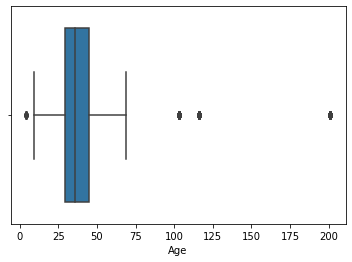

In [38]:
sns.boxplot(data = df_final, x='Age')

In [39]:
df_final = df_final[df_final['Age']<100]

In [40]:
df_final = df_final[df_final['Age']>4]

In [41]:
df_final['Age'].max()

69.0

In [42]:
df_final

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,"newport news, virginia, usa",51.0


In [43]:
df_final['Age'].describe()

count    69531.000000
mean        37.392300
std         10.917806
min          9.000000
25%         29.000000
50%         36.000000
75%         45.000000
max         69.000000
Name: Age, dtype: float64

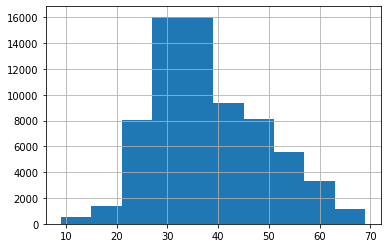

In [44]:
df_final['Age'].hist()

In [47]:
df_final_list = df_final.groupby('User-ID')['Book-Title'].apply(list).reset_index()

In [48]:
df_final_list

,User-ID,Book-Title
0,254,"[Bridget Jones's Diary, The Secret Life of Bee..."
1,2276,"[The Runaway Jury, The Brethren, The King of T..."
2,2766,"[Wild Animus, The Lovely Bones: A Novel, The S..."
3,2977,"[Wild Animus, The Testament, The Firm, Jurassi..."
4,3363,"[Wild Animus, The Lovely Bones: A Novel, The D..."
...,...,...
636,274301,"[Wild Animus, The Nanny Diaries: A Novel, The ..."
637,274308,"[The Da Vinci Code, Bridget Jones's Diary, Ang..."
638,275970,"[The Secret Life of Bees, Divine Secrets of th..."
639,277427,"[Wild Animus, The Lovely Bones: A Novel, The D..."


In [49]:
df_lst = df_final_list['Book-Title'].to_list()

In [54]:
te = TransactionEncoder()


In [55]:
te_arr = te.fit(df_lst).transform(df_lst)

In [56]:
df_ap = pd.DataFrame(te_arr, columns=te.columns_)

In [57]:
df_ap

,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,3rd Degree,4 Blondes,84 Charing Cross Road,...,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wouldn't Take Nothing for My Journey Now,Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
637,False,False,False,False,False,False,True,True,False,False,...,False,False,True,True,False,False,False,False,False,False
638,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
639,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
frequent_sets = apriori(df_ap,min_support = 0.1, use_colnames=True)

In [65]:
frequent_sets

,support,itemsets
0,0.179407,(1st to Die: A Novel)
1,0.137285,(2nd Chance)
2,0.126365,(A Bend in the Road)
3,0.101404,"(A Child Called \It\"": One Child's Courage to ..."
4,0.162246,(A Is for Alibi (Kinsey Millhone Mysteries (Pa...
...,...,...
317,0.104524,"(Wild Animus, To Kill a Mockingbird)"
318,0.101404,"(Tuesdays with Morrie: An Old Man, a Young Man..."
319,0.109204,"(Wild Animus, Where the Heart Is (Oprah's Book..."
320,0.101404,"(The Client, A Time to Kill, The Pelican Brief)"


In [66]:
confidence_1 = association_rules(frequent_sets, metric="confidence",
                  min_threshold=0.4).sort_values('lift', ascending=False)

In [70]:
confidence_1.to_excel("rules.xlsx")

In [73]:
confidence_1.to_csv('data.xlsx')
!cp data.xlsx "/content/gdrive/MyDrive"